**Question 1) What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?**

**Answer-2)**

The fundamental idea behind ensemble techniques is "wisdom of the crowd." Instead of relying on a single model to make a prediction, you build multiple models (called "weak learners") and then combine their predictions to get a final, more accurate, and robust result (a "strong learner").

Think of it like asking for a second opinion—or ten. A single expert might be wrong, but if you ask a diverse group of ten experts and most of them agree on an answer, that answer is much more likely to be correct. Ensembles apply this logic to machine learning.

**Bagging vs. Boosting**

Bagging and Boosting are two of the most popular ensemble methods, but they follow opposite strategies to achieve this "wisdom of the crowd" effect.

Here’s a breakdown of how they differ in their approach and main objective.

1. Approach (How They Train Models)

    **Bagging (Bootstrap Aggregating)**: Works in parallel.

    i. It creates many random subsets of the original training data (this is called "bootstrapping," where samples are picked with replacement).

    ii. It trains a separate, independent model on each of these subsets.

    iii. All models are trained at the same time, without influencing each other.

    iv. Analogy: You give 10 different experts random samples of the evidence and ask them to come to a conclusion independently.

    **Boosting:** Works sequentially.

    i. It trains a single model on the data.

    ii. It then identifies the errors (misclassified data points) made by that first model.

    iii. It trains a second model, telling it to pay extra attention to the specific data points the first model got wrong.

    iv. This process repeats, with each new model sequentially focusing on the mistakes of its predecessor.

    v. Analogy: You show the evidence to the first expert. Then, you show the same evidence to a second expert, but you highlight all the points the first expert got wrong, telling them to focus on those.

2. Objective (What They Try to Fix)

    **Bagging:** The main goal is to reduce variance.

    Variance is the problem of a model being too sensitive to the specific training data it saw. This leads to overfitting, where the model learns the "noise" in the data, not just the underlying pattern.


    By training many models on different random samples and averaging their predictions (or taking a majority vote), bagging smooths out these idiosyncrasies. The individual errors of each model tend to cancel each other out.


    A classic example of bagging is a Random Forest.

    **Boosting:** The main goal is to reduce bias.

    i. Bias is the problem of a model being too simple and making fundamental errors (e.g., drawing a straight line through data that is clearly curved). This leads to underfitting.

    ii. By sequentially focusing on errors, boosting builds a highly complex and accurate final model. It turns a collection of "weak" models (which may be high-bias) into a single, powerful "strong" learner.

    iii. Popular examples of boosting include AdaBoost, Gradient Boosting (GBM), and XGBoost

 **Question-2) Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.**

**Answer-2)**

A Random Forest Classifier reduces overfitting by averaging the predictions of many different, decorrelated decision trees.

A single decision tree is prone to overfitting because it can grow very deep, learning the specific noise and quirks of the training data. This leads to high variance—its structure would change drastically if trained on a slightly different dataset.

Random Forest combats this high variance using two main techniques:

Bagging (Bootstrap Aggregating): Each tree in the forest is trained on a different random subset of the original data (a "bootstrap sample"). This means each tree sees a slightly different view of the data, preventing any single tree from overfitting to the entire dataset's noise.

Feature Randomness (Subspace Sampling): When building a tree, at each split, the algorithm only considers a random subset of features to find the best split. This is the "random" part of Random Forest. It prevents all the trees from relying on the same one or two dominant features, forcing them to find alternative patterns. This "decorrelates" the trees, making them structurally different.

By combining the votes of many diverse and uncorrelated trees, the individual errors and noisy patterns learned by any single tree get canceled out, leaving only the strong, underlying pattern that is common across all trees.


**Role of Key Hyperparameters**

Two key hyperparameters are at the heart of this overfitting control:

1. n_estimators

    What it is: The number of trees to build in the forest.

    How it reduces overfitting: This hyperparameter directly controls the "averaging" part. A single tree (or a low n_estimators value like 5) still has high variance. As you add more and more trees, the predictions of the ensemble become more stable, and the variance decreases. The collective "wisdom of the crowd" becomes stronger. Increasing n_estimators generally won't cause overfitting, but it will plateau in performance while increasing computational cost.

2. max_features

    What it is: The number (or percentage) of features to consider at each split.

    How it reduces overfitting: This is arguably the most important hyperparameter for reducing variance. It controls the "feature randomness" (decorrelation).

    If max_features was set to all features, every tree would be built on a different data sample (from bagging), but they would still be very similar (correlated). They would all likely pick the same "best" feature to split on at the top.

    By setting it to a smaller number (a common default is sqrt(n_features)), you force the trees to be different. Some trees won't even see the "best" feature at a split, so they must find the next-best split, leading to a wide variety of tree structures. This diversity is what makes the ensemble averaging so effective.

**Question- 3) What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.**

**Answer-3)**

Stacking (or Stacked Generalization) is an ensemble technique that uses a new model (called a "meta-model") to learn how to best combine the predictions from multiple, often different, base models.

Instead of just averaging or voting (like bagging) or sequentially weighting (like boosting), stacking trains a "manager" model that learns the strengths and weaknesses of each "worker" model.

Here’s the step-by-step process:

1. Train Base Models (Level-0): First, you train several different models (called base learners or Level-0 models) on the same training data. For example, you might train a Random Forest, a Support Vector Machine (SVM), and a k-Nearest Neighbors (k-NN) model.

2. Generate Predictions: You use these trained base models to make predictions. Critically, to prevent data leakage, this is almost always done using out-of-fold predictions from cross-validation. These predictions become the new features for the next stage.


3. Train Meta-Model (Level-1): You create a new, simpler model (called the meta-model or Level-1 model). This meta-model is trained on the predictions from the base models. Its "features" are the predictions from Step 2, and its "target" is the original true label.



4. Make Final Predictions: To predict a new, unseen data point, you first feed it to all the base models. You take their predictions, feed those as a new input into the meta-model, and the meta-model's output is your final prediction.


**How Stacking Differs from Bagging and Boosting**

The primary difference is in how the models' predictions are combined and what kind of models are used.

1. Combination Method:

    Bagging uses a simple democratic process: averaging (for regression) or majority vote (for classification). Every model gets an equal say.

    Boosting uses a sequential, weighted vote. Each model is built to correct the errors of the previous one, and better-performing models are given more influence in the final decision.

    Stacking does not use a simple vote or pre-defined weights. It learns the optimal combination by training a meta-model. The meta-model essentially learns the "weights," figuring out which base models are more trustworthy and in what contexts.

2. Model Type:

    Bagging and Boosting are homogeneous ensembles. They use many instances of the same type of algorithm (e..g., all Decision Trees in a Random Forest, or all shallow Decision Trees in a Gradient Boosting model).

    Stacking is typically a heterogeneous ensemble. It excels when you combine different types of models (e.g., a Random Forest, a Support Vector Machine (SVM), and a k-Nearest Neighbors (k-NN) model). The goal is to get "opinions" from models that learn in different ways, giving the meta-model a richer, more diverse set of inputs to learn from.

**Simple Example Use Case**

Problem: You want to build a highly accurate model to predict if a patient has a specific disease, based on their medical data.

You find that different models are good at different things:

1. A Logistic Regression model is great at finding simple, linear relationships in the patient's lab-test numbers.

2. A Random Forest is great at finding complex, non-linear interactions between features like age, weight, and family history.

3. A k-Nearest Neighbors (k-NN) model is good at finding clusters of patients who are "similar" to each other.

Instead of choosing just one, you can stack them:

1. Level 0 (Base Models): You train all three models (Logistic Regression, Random Forest, k-NN) on your training data.

2. Level 1 (Meta-Model): You train a new, simple model (like another Logistic Regression or a small Neural Network). The training data for this "manager" model isn't the original patient data. Its features are the predictions from your three base models.

**How it works:**

A new patient's data is fed to all three base models.

The Logistic Regression says: "80% chance of disease."

The Random Forest says: "60% chance of disease."

The k-NN says: "90% chance of disease."

These three predictions—[0.80, 0.60, 0.90]—are fed as input to the meta-model.

The meta-model, having been trained on these patterns, might have learned that "when k-NN and Logistic Regression both agree strongly, they are almost always right, even if the Random Forest is less sure." It then makes the final, combined prediction.


**Question 4) What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?**

**Answer-4)**

The Out-of-Bag (OOB) Score is a method for measuring the prediction error of a Random Forest model using the data that was not used to build each tree.

It's a built-in validation mechanism that allows you to evaluate your model's performance without needing to set aside a separate validation set.

**Why It's Useful and How It Works**

Here’s the step-by-step breakdown of how it works and why it's so valuable:

1. ootstrapping Leaves Data Out: A Random Forest builds its "forest" from many trees. Each individual tree is trained on a "bootstrap sample" of the data, which means it randomly selects data points from the training set with replacement. Because of this, any given bootstrap sample will, on average, contain only about 63% of the original data points.



2. The "Out-of-Bag" (OOB) Data: The remaining 37% of the data points that were not included in that tree's bootstrap sample are called the "Out-of-Bag" (OOB) samples for that specific tree.

3. Using OOB for Validation: This is the clever part. After a tree is trained, it has never seen its OOB samples. Therefore, these OOB samples can be used as a "mini" validation set for that tree alone.


4. Calculating the Final OOB Score: To get a single OOB score for the entire forest, the model does the following for each data point in the training set:

    It finds all the trees in the forest that did not use that data point in their training (i.e., all the trees for which it was an OOB sample).

    It lets those trees "vote" (for classification) or "average" (for regression) a prediction for that data point.

    This aggregated prediction is then compared to the data point's true label.

The OOB Score is the final accuracy (or other metric) calculated from these aggregated OOB predictions. It is essentially an unbiased estimate of the model's performance on unseen data.


**How This Replaces a Validation Set**

The OOB score's main advantage is that it provides a reliable estimate of generalization error without sacrificing training data.

1. In a typical workflow, you must split your data (e.g., 80% train, 20% validation). This means your model is trained on only 80% of the available data, which can be a problem if your dataset is small.

2. With the OOB score, you can train your Random Forest on 100% of your data. The model uses the OOB subsampling process internally to create its own validation, effectively giving you the benefit of cross-validation "for free" during the training process.

This makes the OOB score highly efficient and particularly useful for smaller datasets where every data point is valuable for training.

**Question 5)** Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

**Answer-5)**

Here is a comparison of AdaBoost and Gradient Boosting,

**How They Handle Errors from Weak Learners**

The core difference lies in what each algorithm tries to fix.

1. AdaBoost (Adaptive Boosting) handles errors by focusing on the specific data points it got wrong. After the first weak learner makes its predictions, AdaBoost identifies all the samples that were misclassified. It then "adapts" by increasing the importance, or weight, of these incorrect samples. The next weak learner is then trained to pay much more attention to these specific, difficult-to-classify samples, effectively forcing it to correct the previous model's mistakes.




2. Gradient Boosting handles errors by focusing on the magnitude of the error itself. Instead of re-weighting data points, it calculates the difference between the actual values and the predicted values for all samples. This difference is called the residual. The next weak learner is then trained to predict these residuals. In essence, each new model isn't trying to predict the original target value, but rather trying to predict the error left over by the combination of all previous models.


**Weight Adjustment Mechanism**

Their adjustment mechanisms directly follow from how they handle errors.

1. AdaBoost uses two types of weights. First, it adjusts the sample weights in each iteration, as described above—increasing weights for misclassified points.9 Second, each weak learner is assigned a final model weight (or "amount of say") in the ensemble based on its overall accuracy.More accurate models get a larger say in the final, weighted vote.

2. Gradient Boosting does not re-weight the data samples. Instead, its adjustment is an additive process. The predictions from the new weak learner (which learned the residual errors) are scaled by a small number called the learning rate (13${\eta}$) and then literally added to the predictions of the previous ensemble.14 This small, incremental addition gradually "boosts" the model's accuracy by correcting the overall error.


**Typical Use Cases**

1. AdaBoost is often used for binary classification tasks. Because it's simpler and computationally faster, it's a great choice for a baseline model or when working with cleaner, less-noisy data. Its most famous real-world application is in the Viola-Jones face detection algorithm used in many early digital cameras.



2. Gradient Boosting is a more general and flexible algorithm. It is a top performer for a wide range of tasks, including both regression and classification, especially on complex, noisy, or high-dimensional tabular data. It forms the foundation for modern, state-of-the-art algorithms like XGBoost and LightGBM, which are extremely popular in data science competitions (like Kaggle) and for building high-accuracy predictive models for things like fraud detection, price prediction, and ranking.

**Question 6) Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.**

**Answer-6)**

CatBoost performs well on categorical features because it uses a special encoding technique that allows it to handle these variables natively, without needing one-hot encoding or manual preprocessing.

Here’s how it works:

1. Target-based (ordered) encoding

    Instead of converting categorical features into dummy variables (like one-hot encoding), CatBoost transforms them into numerical values based on target statistics (e.g., the mean target value for each category).

    Example:
    If a feature is “City” and the target is “Purchased,” CatBoost replaces each city with the average purchase rate for that city.

2. Ordered encoding to prevent target leakage

    A common issue with target encoding is data leakage (using the whole dataset’s target information).

    CatBoost solves this using ordered statistics:

    For each training example, the encoding is computed only using previous examples in a random permutation — never the current or future ones.

    This ensures the model doesn’t see the true target value of the current sample during training.

3. Combinations of categorical features

    CatBoost can automatically create and encode combinations of categorical features (e.g., “City + Product”), capturing richer interactions without manual feature engineering.


Summary:-

CatBoost’s categorical handling advantages:

No need for one-hot encoding or label encoding.

Prevents target leakage via ordered encoding.

Efficiently handles high-cardinality features.

Learns complex category interactions automatically.

In short:-

CatBoost converts categorical data into numerical form using ordered target statistics, allowing it to learn from categorical variables effectively and safely — which is why it performs so well without extensive preprocessing.

In [6]:
"""
Question 7) KNN Classifier Assignment: Wine Dataset Analysis with Optimization Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using: a. Accuracy b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric (Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.

Answer- 7)
"""

#Here is the complete Python code to perform all the steps of your assignment.

#This script executes all 6 of your tasks, from loading the data to training the final optimized model and comparing the results.

import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- 1. Load the Wine dataset ---
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

# --- 2. Split data into 70% train and 30% test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("--- 1. & 2. Data Loaded and Split ---")
print(f"Total dataset shape: {X.shape}")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}\n")


# --- 3. Train a KNN classifier (default K=5) without scaling ---
print("--- 3. KNN (K=5) Without Scaling ---")
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_unscaled = knn_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

print(f"Accuracy: {accuracy_unscaled:.4f}")
print("\nClassification Report (Unscaled):")
print(classification_report(y_test, y_pred_unscaled, target_names=target_names))


# --- 4. Apply StandardScaler, retrain KNN (K=5), and compare ---
print("--- 4. KNN (K=5) With StandardScaler ---")

# Initialize scaler and fit ONLY on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Retrain KNN on scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy: {accuracy_scaled:.4f}")
print("\nClassification Report (Scaled):")
print(classification_report(y_test, y_pred_scaled, target_names=target_names))


# --- 5. Use GridSearchCV to find the best K and distance metric ---
print("--- 5. Hyperparameter Tuning (GridSearchCV) ---")

# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 21)),        # Test K from 1 to 20
    'metric': ['euclidean', 'manhattan']      # Test two distance metrics
}

# Initialize the base KNN classifier
knn_grid = KNeighborsClassifier()

# Initialize GridSearchCV (cv=5 means 5-fold cross-validation)
# We use the SCALED data, as we've already proven it's far superior.
grid_search = GridSearchCV(estimator=knn_grid,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1) # Use all available CPU cores

# Fit the grid search on the SCALED training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"\nGridSearch Complete.")
print(f"Best Parameters Found: {best_params}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}\n")


# --- 6. Train the optimized KNN and compare results ---
print("--- 6. Optimized KNN Performance (using Best Params) ---")

# The grid_search object automatically retrains the best model on
# the entire training set. We can access it at .best_estimator_
best_knn = grid_search.best_estimator_

# Evaluate on the (scaled) test set
y_pred_best = best_knn.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"Using best params: {best_params}")
print(f"Test Set Accuracy: {accuracy_best:.4f}")
print("\nClassification Report (Optimized):")
print(classification_report(y_test, y_pred_best, target_names=target_names))


# --- FINAL SUMMARY ---
print("--- FINAL ACCURACY COMPARISON ---")
print(f"1. Unscaled KNN (K=5):     {accuracy_unscaled:.4f}")
print(f"2. Scaled KNN (K=5):       {accuracy_scaled:.4f}")
print(f"3. Optimized KNN (Best K): {accuracy_best:.4f}")

--- 1. & 2. Data Loaded and Split ---
Total dataset shape: (178, 13)
Training set shape: (124, 13)
Test set shape: (54, 13)

--- 3. KNN (K=5) Without Scaling ---
Accuracy: 0.7407

Classification Report (Unscaled):
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        19
     class_1       0.75      0.71      0.73        21
     class_2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

--- 4. KNN (K=5) With StandardScaler ---
Accuracy: 0.9630

Classification Report (Scaled):
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      0.90      0.95        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.9

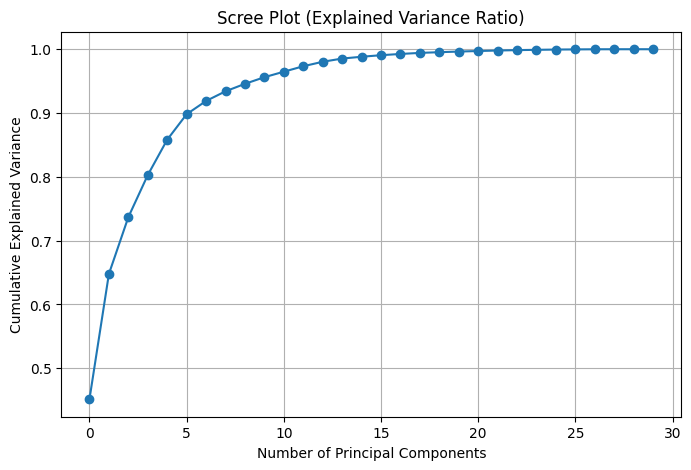

Number of components retained to preserve 95% variance: 10

🔹 KNN on Original Data:
Accuracy: 0.9591
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        64
           1       0.94      1.00      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


🔹 KNN on PCA-Transformed Data:
Accuracy: 0.9532
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.94      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171


✅ Accuracy Comparison:
Original Data Accuracy: 0.9591
PCA Data Accuracy (95% variance): 0.9532


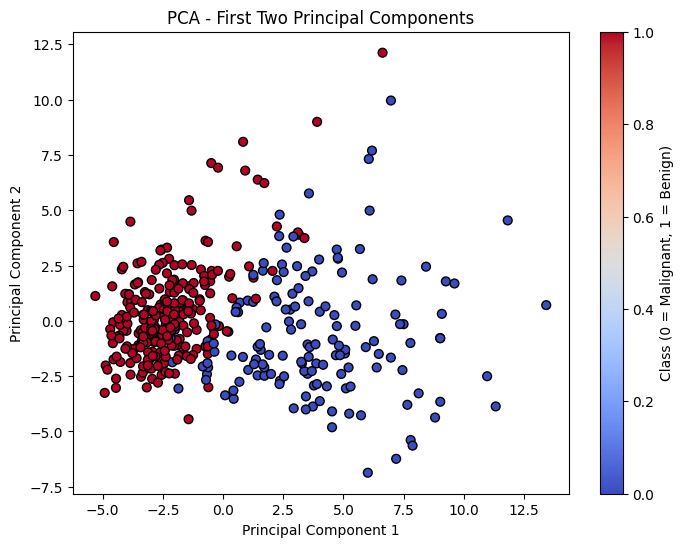

In [7]:
"""
Question 8)

PCA + KNN with Variance Analysis and Visualization Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

Answer-8)
"""

#Here’s the complete Python program for performing PCA + KNN with variance analysis and visualization using the Breast Cancer dataset.

# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 3: Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Apply PCA
pca = PCA()
pca.fit(X_train_scaled)

# Step 6: Plot Scree Plot (Explained Variance Ratio)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot (Explained Variance Ratio)")
plt.grid(True)
plt.show()

# Step 7: Retain 95% variance
pca_95 = PCA(0.95)
X_train_pca = pca_95.fit_transform(X_train_scaled)
X_test_pca = pca_95.transform(X_test_scaled)

print(f"Number of components retained to preserve 95% variance: {pca_95.n_components_}")

# Step 8: Train KNN on original data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train_scaled, y_train)
y_pred_original = knn_original.predict(X_test_scaled)
acc_original = accuracy_score(y_test, y_pred_original)
print("\n🔹 KNN on Original Data:")
print(f"Accuracy: {acc_original:.4f}")
print(classification_report(y_test, y_pred_original))

# Step 9: Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print("\n🔹 KNN on PCA-Transformed Data:")
print(f"Accuracy: {acc_pca:.4f}")
print(classification_report(y_test, y_pred_pca))

# Step 10: Compare results
print("\n✅ Accuracy Comparison:")
print(f"Original Data Accuracy: {acc_original:.4f}")
print(f"PCA Data Accuracy (95% variance): {acc_pca:.4f}")

# Step 11: Visualize first two principal components
plt.figure(figsize=(8, 6))
X_pca_2D = pca.fit_transform(X_train_scaled)[:, :2]
plt.scatter(X_pca_2D[:, 0], X_pca_2D[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=40)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - First Two Principal Components")
plt.colorbar(label='Class (0 = Malignant, 1 = Benign)')
plt.show()


--- Task 2: Metric Comparison (K=5) ---
MSE (Euclidean, p=2): 5446.2363
MSE (Manhattan, p=1): 5975.7386

--- Task 3: K-Value Analysis (Bias-Variance Tradeoff) ---
K-value analysis complete. Plotting results...


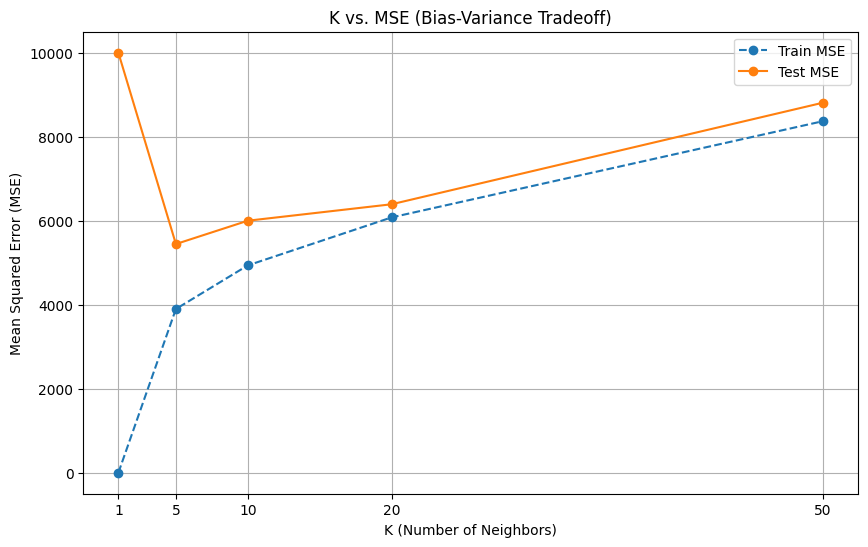

In [14]:
"""
Question 9:)

KNN Regressor with Distance Metrics and K-Value Analysis Task:
1. Generate a synthetic regression dataset (sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

Answer-9)
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate a synthetic regression dataset
# We add noise to make the regression task non-trivial
X, y = make_regression(n_samples=500, n_features=10, noise=25, random_state=42)

# --- Data Preparation (Split and Scale) ---
# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling is CRITICAL for distance-based algorithms like KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------------------------------------------

# 2. Train KNN regressor with different distance metrics (K=5)
print("--- Task 2: Metric Comparison (K=5) ---")

# a. Euclidean distance (p=2)
# 'minkowski' with p=2 is the mathematical equivalent of Euclidean distance
knn_euclidean = KNeighborsRegressor(n_neighbors=5, p=2)
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

print(f"MSE (Euclidean, p=2): {mse_euclidean:.4f}")

# b. Manhattan distance (p=1)
# 'minkowski' with p=1 is the mathematical equivalent of Manhattan distance
knn_manhattan = KNeighborsRegressor(n_neighbors=5, p=1)
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print(f"MSE (Manhattan, p=1): {mse_manhattan:.4f}")

# -----------------------------------------------------------------

# 3. Test K values and plot K vs. MSE
print("\n--- Task 3: K-Value Analysis (Bias-Variance Tradeoff) ---")
k_values = [1, 5, 10, 20, 50]
train_mse_scores = []
test_mse_scores = []

for k in k_values:
    # We'll use the default Euclidean distance (p=2) for this analysis
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Evaluate on training data
    y_pred_train = knn.predict(X_train_scaled)
    train_mse_scores.append(mean_squared_error(y_train, y_pred_train))

    # Evaluate on test data
    y_pred_test = knn.predict(X_test_scaled)
    test_mse_scores.append(mean_squared_error(y_test, y_pred_test))

print("K-value analysis complete. Plotting results...")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_mse_scores, marker='o', linestyle='--', label='Train MSE')
plt.plot(k_values, test_mse_scores, marker='o', label='Test MSE')
plt.title('K vs. MSE (Bias-Variance Tradeoff)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

--- Comparing KNN Algorithms (k=7) ---
Dataset shape (train): (614, 8)
----------------------------------------
           Train Time (s)  Accuracy
Algorithm                          
brute            0.002680  0.727273
kd_tree          0.002753  0.727273
ball_tree        0.002207  0.727273
----------------------------------------

Best Performing Algorithm: **ball_tree**
Best Accuracy: 0.7273
Top 2 features found by Random Forest: Insulin, Glucose


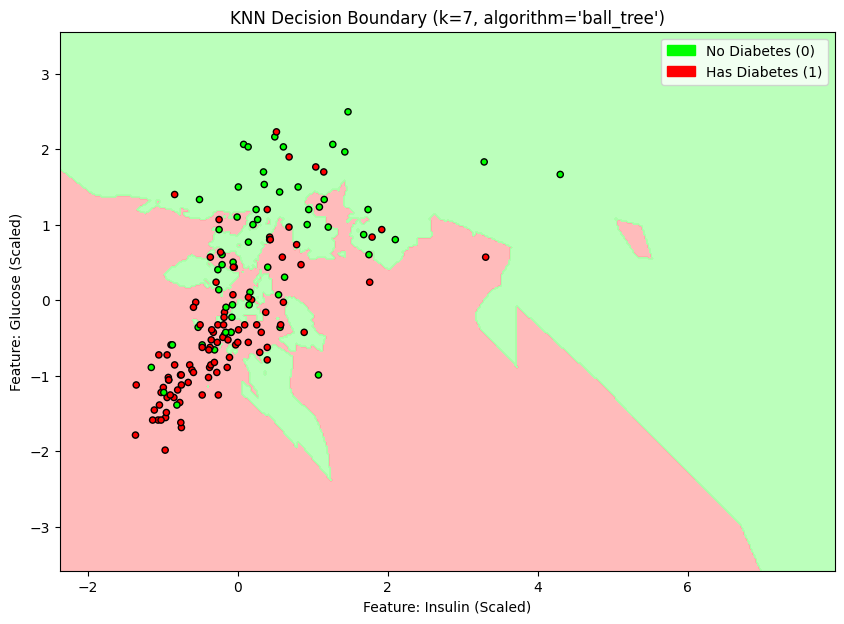

In [16]:
"""
Question-10)

KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data Task:

1. Load the Pima Indians Diabetes dataset (contains missing values).

2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.

3. Train KNN using:
  a. Brute-force method
  b. KD-Tree
  c. Ball Tree

4. Compare their training time and accuracy.

5. Plot the decision boundary for the best-performing method (use 2 most important features).

Answer 10)

"""

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier # To find important features

# --- 1. Load Data ---
# This dataset is known to use 0 as a placeholder for missing values in
# several columns where 0 is not biologically possible.
url = "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"
data = pd.read_csv(url)

# --- 2. Preprocessing & KNN Imputation ---

# Define columns where 0 means "missing"
cols_with_zeros_as_nan = [
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI'
]

# Replace 0 with np.nan in those columns
data[cols_with_zeros_as_nan] = data[cols_with_zeros_as_nan].replace(0, np.nan)

# Define features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
feature_names = X.columns.tolist() # Save feature names for later

# Split data *before* imputation and scaling to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2a. KNN Imputation
# We use k=5 for imputation, a common default
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# 2b. Scaling (Crucial for KNN)
# KNN is distance-based, so features must be on the same scale.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# --- 3. & 4. Train KNN Models and Compare Performance ---

# We'll test with a common k value for the classifier, e.g., k=7
# This is distinct from the k=5 we used for imputation
k_classifier = 7
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = []

print(f"--- Comparing KNN Algorithms (k={k_classifier}) ---")
print(f"Dataset shape (train): {X_train_scaled.shape}")
print("-" * 40)

for algo in algorithms:
    start_time = time.time()

    # Initialize and train the model
    knn = KNeighborsClassifier(n_neighbors=k_classifier, algorithm=algo)
    knn.fit(X_train_scaled, y_train)

    train_time = time.time() - start_time

    # Evaluate on the test set
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    results.append({
        'Algorithm': algo,
        'Train Time (s)': train_time,
        'Accuracy': acc
    })

# Print results in a clean table
results_df = pd.DataFrame(results).set_index('Algorithm')
print(results_df)
print("-" * 40)

# Find the best algorithm (highest accuracy, then lowest time)
best_algo = results_df.sort_values(by=['Accuracy', 'Train Time (s)'], ascending=[False, True]).iloc[0]
best_algo_name = best_algo.name
print(f"\nBest Performing Algorithm: **{best_algo_name}**")
print(f"Best Accuracy: {best_algo['Accuracy']:.4f}")

# --- 5. Plot Decision Boundary for Best Method ---

# We need the 2 most important features. KNN doesn't provide this,
# so we use a Random Forest as a proxy to find them.
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
importances = rf.feature_importances_

# Get indices of the top 2 features
top2_indices = np.argsort(importances)[-2:]
top2_features = [feature_names[i] for i in top2_indices]

print(f"Top 2 features found by Random Forest: {', '.join(top2_features)}")

# Prepare data with only the top 2 features
X_train_2f = X_train_scaled[:, top2_indices]
X_test_2f = X_test_scaled[:, top2_indices]

# Retrain the best KNN model *only* on these 2 features
knn_best_2f = KNeighborsClassifier(n_neighbors=k_classifier, algorithm=best_algo_name)
knn_best_2f.fit(X_train_2f, y_train)

# Create a meshgrid to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_2f[:, 0].min() - 1, X_train_2f[:, 0].max() + 1
y_min, y_max = X_train_2f[:, 1].min() - 1, X_train_2f[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Make predictions on the meshgrid
Z = knn_best_2f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA']) # Red/Green for background
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])  # Red/Green for points

# Plot the decision boundary
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot the test points
plt.scatter(X_test_2f[:, 0], X_test_2f[:, 1], c=y_test, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"KNN Decision Boundary (k={k_classifier}, algorithm='{best_algo_name}')")
plt.xlabel(f"Feature: {top2_features[0]} (Scaled)")
plt.ylabel(f"Feature: {top2_features[1]} (Scaled)")

# Create a custom legend
import matplotlib.patches as mpatches
patch0 = mpatches.Patch(color='#FF0000', label='Has Diabetes (1)')
patch1 = mpatches.Patch(color='#00FF00', label='No Diabetes (0)')
plt.legend(handles=[patch1, patch0])

plt.show()